In [34]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('./train.csv')
df.head(10)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
5,5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
6,6,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,West_Nile_fever
7,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Tungiasis
8,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
9,9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya


C:\Users\TAB\AppData\Local\Temp\ipykernel_3536\2410690691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns=["id"]).corr()


<AxesSubplot: >

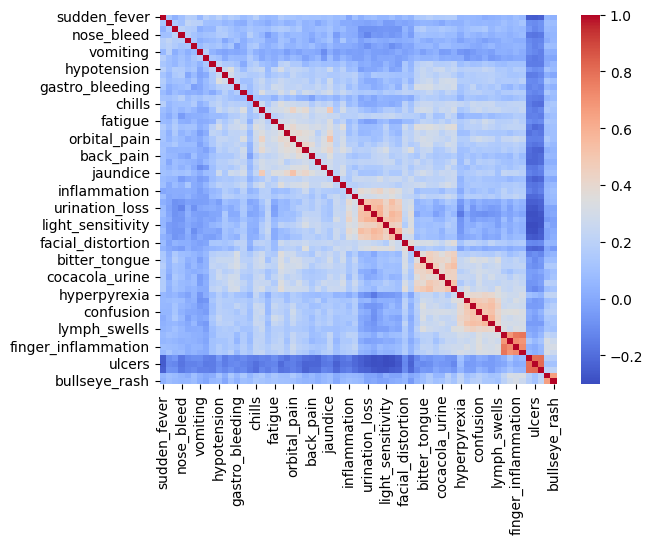

In [48]:
import seaborn as sns
corr = df.drop(columns=["id"]).corr()
sns.heatmap(corr, cmap='coolwarm')


In [36]:
encoder = LabelEncoder()
train_df = df.copy()
train_df['prognosis'] = encoder.fit_transform(train_df['prognosis'])
train_df['prognosis'][0:10]

0     3
1     7
2     3
3    10
4     6
5     3
6     8
7     7
8     4
9     0
Name: prognosis, dtype: int32

In [37]:

# METHOD TO CALCULATE THE AVERAGE PRECISION AT A GIVEN VALUE
def apk(actual, predicted, k=10):

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

# METHOD TO CALCULATE THE MEAN AVERAGE PRECISION AT A GIVEN VALUE
def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


In [38]:
train_df.drop(['id'], axis = 1, inplace = True)
train_df.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6


In [39]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('prognosis', axis=1), train_df['prognosis'], random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [41]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'SVM' : SVC(probability=True),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier()
    }

result = pd.DataFrame(columns = ['map3'])

for method, func in classifiers.items():
    func.fit(X_train, y_train)
    predictions = func.predict_proba(X_test)
    sorted_prediction_ids = np.argsort(-predictions, axis=1)
    top_3_prediction_ids = sorted_prediction_ids[:,:3]
    result.loc[method] = [mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)]
result

c:\Users\TAB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,map3
Logistic Regression,0.300377
Decision Tree,0.165725
Random Forest,0.336158
SVM,0.373823
K-nearest Neighbors,0.258004
XGBoost,0.339925


In [103]:
svm = classifiers['SVM']
svm.set_params(class_weight='balanced')
svm.fit(X_train, y_train)
pred = svm.predict_proba(X_test)
sorted_pred = np.argsort(-pred, axis=1)
top_3_pred = sorted_pred[:,:3]
print("MAPK Score (balanced classes): ", mapk(y_test.values.reshape(-1, 1), top_3_pred, k=3))


MAPK Score (balanced classes):  0.37664783427495296


In [84]:
model = classifiers["SVM"]
model.fit(X_train,y_train)
pred =  model.predict_proba(X_test)
sorted_pred = np.argsort(-pred, axis=1)
top_3_pred = sorted_pred[:,:3]
print("MAPK Score: ", mapk(y_test.values.reshape(-1, 1), top_3_pred, k=3))

MAPK Score:  0.3804143126177025


In [85]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Make predictions
test_predictions = model.predict_proba(test_df.drop(['id'], axis = 1))

# Get the sorted indices of predictions and take the top 3
test_sorted_prediction_ids = np.argsort(-test_predictions, axis=1)
test_top_3_prediction_ids = test_sorted_prediction_ids[:,:3]

In [87]:


# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = test_top_3_prediction_ids.shape
test_top_3_predictions = encoder.inverse_transform(test_top_3_prediction_ids.reshape(-1, 1))
test_top_3_predictions = test_top_3_predictions.reshape(original_shape)
test_top_3_predictions[:10]

c:\Users\TAB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([['Rift_Valley_fever', 'Dengue', 'Tungiasis'],
       ['Dengue', 'Chikungunya', 'Rift_Valley_fever'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Rift_Valley_fever'],
       ['Japanese_encephalitis', 'Rift_Valley_fever', 'Tungiasis'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Malaria'],
       ['Zika', 'Yellow_Fever', 'West_Nile_fever'],
       ['Japanese_encephalitis', 'Malaria', 'West_Nile_fever'],
       ['Dengue', 'Chikungunya', 'Tungiasis'],
       ['Japanese_encephalitis', 'Yellow_Fever', 'Zika'],
       ['Yellow_Fever', 'West_Nile_fever', 'Japanese_encephalitis']],
      dtype=object)

In [88]:
# Now to get our array of labels into a single column for our submission we can just join on on a space across axis 1
test_df['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, test_top_3_predictions)
test_df['prognosis'][:10]

0                   Rift_Valley_fever Dengue Tungiasis
1                 Dengue Chikungunya Rift_Valley_fever
2    West_Nile_fever Japanese_encephalitis Rift_Val...
3    Japanese_encephalitis Rift_Valley_fever Tungiasis
4        West_Nile_fever Japanese_encephalitis Malaria
5                    Zika Yellow_Fever West_Nile_fever
6        Japanese_encephalitis Malaria West_Nile_fever
7                         Dengue Chikungunya Tungiasis
8              Japanese_encephalitis Yellow_Fever Zika
9    Yellow_Fever West_Nile_fever Japanese_encephal...
Name: prognosis, dtype: object

In [89]:
test_df.to_csv('submission2.csv', columns=['id', 'prognosis'], index=False)